# Principal Component Analysis and DFM

> Realizando a análise de componentes principais e posteriormente aplicando o primeiro modelo DFM para os dados

# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [3]:
pio.renderers.default = 'browser'

# Lendo os dados

In [4]:
data = pd.read_csv('../../data/data_tf.csv')
# data['Date'] = pd.date_range(start = '2002-03-01', end = '2022-09-01', freq = 'QS-DEC') --> se fosse para trimestre 
data['Date'] = pd.date_range(start = '2002-01-01', end = '2022-09-01', freq = 'MS')
data.set_index('Date', inplace = True)
gdp = data['gdp']
data.drop('gdp', axis = 1, inplace = True)
# data.rename(columns={'retail_sales':'com_sales'}, inplace=True)
data

,ibc_br,mon_gdp,ipca,ipca_ex,ipca_exi,ipca_exii,ipca_exiii,inpc,igpm,igpdi,...,gt_crise,gt_desemprego,gt_seguro_desemprego,gt_empregos,gt_trabalho,gt_fgts,gt_renda,gt_salario,gt_economia,nuci_gv
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-01,-0.32,1839.75,0.52,0.005,0.74,0.44,0.44,1.07,0.36,0.19,...,0.0,18.0,15.0,-2.0,1.0,7.0,0.0,0.0,0.0,78.6
2002-02-01,-0.32,-897.70,0.36,0.340,0.73,0.42,0.46,0.31,0.06,0.18,...,0.0,18.0,15.0,-2.0,1.0,7.0,0.0,0.0,0.0,79.2
2002-03-01,-0.32,6967.60,0.60,-0.400,0.52,0.51,0.54,0.62,0.09,0.11,...,0.0,18.0,15.0,-2.0,1.0,7.0,0.0,0.0,0.0,78.3
2002-04-01,-0.32,1941.20,0.80,0.080,0.50,0.50,0.53,0.68,0.56,0.70,...,0.0,18.0,15.0,-2.0,1.0,7.0,0.0,0.0,0.0,77.4
2002-05-01,-0.32,3166.60,0.21,0.010,0.47,0.38,0.53,0.09,0.83,1.11,...,0.0,18.0,15.0,-2.0,1.0,7.0,0.0,0.0,0.0,77.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,0.67,12533.60,0.47,0.050,0.52,1.10,1.06,0.45,0.52,0.69,...,0.0,17.0,14.0,0.0,0.0,20.0,6.0,1.0,0.0,80.3
2022-06-01,-0.84,4733.70,0.67,-0.170,0.90,0.98,1.01,0.62,0.59,0.62,...,1.0,17.0,14.0,-1.0,-1.0,12.0,-11.0,-2.0,0.0,80.8
2022-07-01,6.92,34975.10,-0.68,-0.340,0.36,0.67,0.63,-0.60,0.21,-0.38,...,-5.0,17.0,14.0,-1.0,-6.0,9.0,-2.0,0.0,-1.0,81.7


In [5]:
# Lendo meta_data

meta_data = pd.read_csv('../../data/meta_data.csv')
meta_data.drop(['tcode', 'transf_code'], axis = 1, inplace = True)
meta_data

,group,category,code,name_df,name,source,frequency,original,order,transf,days_lag,where
0,0,Produção,22099,gdp,PIB trimestral - Dados observados - preços de ...,IBGE,Q,Index,I(1),diff,63,BCB
1,0,Produção,24363,ibc_br,Índice de Atividade Econômica do Banco Central...,BCB,M,Index,I(1),diff,52,BCB
2,0,Produção,4380,mon_gdp,PIB mensal - Valores correntes (R$ milhões)\t,BCB,M,R$,I(1),diff,48,BCB
3,0,Produção,21859,ind_prod,Indicadores da produção (2012=100) - Produção ...,IBGE,M,Index,I(1),diff,30,BCB
4,0,Produção,21861,ind_prod_ext,Indicadores da produção (2012=100) - Produção ...,IBGE,M,Index,I(1),diff,30,BCB
...,...,...,...,...,...,...,...,...,...,...,...,...
149,9,Google Trends,trabalho,gt_trabalho,Google Trends - Trabalho,Google,M,Trend Index,I(1),diff,0,Pytrends
150,9,Google Trends,fgts,gt_fgts,Google Trends - FGTS,Google,M,Trend Index,I(0),none,0,Pytrends
151,9,Google Trends,renda,gt_renda,Google Trends - Renda,Google,M,Trend Index,I(1),diff,0,Pytrends
152,9,Google Trends,salario,gt_salario,Google Trends - Salário,Google,M,Trend Index,I(1),diff,0,Pytrends


# Categorias dos dados

In [6]:
series_groups = meta_data[['group', 'category']].copy()
counts = series_groups.groupby(['group', 'category']).size().values
groups = series_groups['group'].unique()
cats = series_groups['category'].unique()

series_groups = pd.DataFrame({'Grupos':groups, 'Categoria':cats, 'Número de séries':counts})
print(series_groups.to_latex(index = False))

\begin{tabular}{rlr}
\toprule
 Grupos &           Categoria &  Número de séries \\
\midrule
      0 &            Produção &                20 \\
      1 &              Preços &                25 \\
      2 & Mercado de Trabalho &                10 \\
      3 &              Vendas &                19 \\
      4 &             Energia &                14 \\
      5 &       Setor Externo &                 9 \\
      6 &       Setor Público &                 9 \\
      7 &         Financeiras &                20 \\
      8 &        Expectativas &                19 \\
      9 &       Google Trends &                 9 \\
\bottomrule
\end{tabular}



C:\Users\HENRI\AppData\Local\Temp\ipykernel_8320\2712447795.py:7: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



In [7]:
# Criando df para mapear grupo no dataframe de contribuição dos componentes

map_comp = meta_data[['category', 'name_df']].copy()
map_comp.set_index('name_df', inplace = True)
map_comp = map_comp.iloc[1:]
map_comp

,category
name_df,
ibc_br,Produção
mon_gdp,Produção
ind_prod,Produção
ind_prod_ext,Produção
ind_prod_transf,Produção
...,...
gt_trabalho,Google Trends
gt_fgts,Google Trends
gt_renda,Google Trends


# PCA

In [8]:
# Definindo caminhos e variáveis necessárias para o PCA e padronizando as variáveis 

cols = data.columns
ind = data.index
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data_scaled = pd.DataFrame(scaled_data, columns = cols, index = ind)
data_scaled

,ibc_br,mon_gdp,ipca,ipca_ex,ipca_exi,ipca_exii,ipca_exiii,inpc,igpm,igpdi,...,gt_crise,gt_desemprego,gt_seguro_desemprego,gt_empregos,gt_trabalho,gt_fgts,gt_renda,gt_salario,gt_economia,nuci_gv
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-01,-0.111255,-0.059902,0.032243,0.022447,0.863652,-0.221720,-0.212815,1.195884,-0.355451,-0.529329,...,-0.014218,-0.179906,-0.090626,-0.176931,0.155175,-0.234126,-0.001419,-0.022194,0.005556,-0.229835
2002-02-01,-0.111255,-0.225472,-0.360593,1.296210,0.829117,-0.291471,-0.137383,-0.449881,-0.682448,-0.540109,...,-0.014218,-0.179906,-0.090626,-0.176931,0.155175,-0.234126,-0.001419,-0.022194,0.005556,-0.083719
2002-03-01,-0.111255,0.250247,0.228662,-1.517475,0.103882,0.022410,0.164344,0.221418,-0.649749,-0.615573,...,-0.014218,-0.179906,-0.090626,-0.176931,0.155175,-0.234126,-0.001419,-0.022194,0.005556,-0.302893
2002-04-01,-0.111255,-0.053766,0.719708,0.307618,0.034812,-0.012466,0.126629,0.351347,-0.137453,0.020479,...,-0.014218,-0.179906,-0.090626,-0.176931,0.155175,-0.234126,-0.001419,-0.022194,0.005556,-0.522068
2002-05-01,-0.111255,0.020350,-0.728878,0.041459,-0.068793,-0.430974,0.126629,-0.926286,0.156845,0.462481,...,-0.014218,-0.179906,-0.090626,-0.176931,0.155175,-0.234126,-0.001419,-0.022194,0.005556,-0.473362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,0.102906,0.586897,-0.090518,0.193550,0.103882,2.080074,2.125572,-0.146713,-0.181052,0.009698,...,-0.014218,-0.362006,-0.257780,0.066471,-0.013552,1.166733,1.058843,0.480204,0.005556,0.184161
2022-06-01,-0.223744,0.115134,0.400528,-0.642951,1.416212,1.661566,1.936992,0.221418,-0.104753,-0.065766,...,0.221798,-0.362006,-0.257780,-0.055230,-0.182280,0.304666,-1.945233,-1.026991,0.005556,0.305925
2022-07-01,1.454939,1.944233,-2.914033,-1.289338,-0.448678,0.580421,0.503788,-2.420468,-0.518950,-1.143819,...,-1.194297,-0.362006,-0.257780,-0.055230,-1.025916,-0.018609,-0.354840,-0.022194,-0.455579,0.525100


In [9]:
data_scaled.corr().round(3)

,ibc_br,mon_gdp,ipca,ipca_ex,ipca_exi,ipca_exii,ipca_exiii,inpc,igpm,igpdi,...,gt_crise,gt_desemprego,gt_seguro_desemprego,gt_empregos,gt_trabalho,gt_fgts,gt_renda,gt_salario,gt_economia,nuci_gv
ibc_br,1.000,0.868,0.019,-0.240,0.005,-0.050,-0.068,0.016,0.034,0.009,...,0.145,-0.044,-0.067,-0.098,0.173,0.053,0.300,-0.320,0.197,0.048
mon_gdp,0.868,1.000,0.085,-0.153,0.004,0.000,-0.014,0.073,0.100,0.081,...,0.154,-0.052,-0.072,-0.201,0.151,0.045,0.290,-0.406,0.165,0.089
ipca,0.019,0.085,1.000,0.230,0.792,0.659,0.588,0.964,0.578,0.548,...,0.012,-0.077,-0.030,0.063,0.011,-0.085,0.044,0.049,-0.036,0.133
ipca_ex,-0.240,-0.153,0.230,1.000,0.270,0.165,0.175,0.148,0.136,0.160,...,-0.118,-0.127,-0.072,-0.100,-0.176,0.023,-0.112,-0.081,-0.139,0.081
ipca_exi,0.005,0.004,0.792,0.270,1.000,0.734,0.710,0.765,0.288,0.271,...,0.025,-0.088,-0.076,0.035,0.033,-0.127,-0.028,0.024,-0.006,0.163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gt_fgts,0.053,0.045,-0.085,0.023,-0.127,-0.198,-0.228,-0.073,0.030,0.029,...,0.026,0.347,0.389,0.017,0.031,1.000,0.029,-0.070,0.020,-0.475
gt_renda,0.300,0.290,0.044,-0.112,-0.028,-0.067,-0.089,0.007,0.034,0.003,...,0.148,0.002,0.021,-0.115,0.190,0.029,1.000,-0.175,0.194,-0.034
gt_salario,-0.320,-0.406,0.049,-0.081,0.024,0.013,-0.000,0.059,-0.003,-0.006,...,-0.163,-0.051,-0.017,0.462,-0.042,-0.070,-0.175,1.000,-0.135,0.036
gt_economia,0.197,0.165,-0.036,-0.139,-0.006,-0.045,-0.064,-0.035,-0.000,0.024,...,0.688,0.147,0.045,-0.267,0.848,0.020,0.194,-0.135,1.000,-0.029


In [10]:
# PCA 

pca = PCA()
pca.fit(data_scaled)
print('Número de componentes =', pca.n_components_)

Número de componentes = 153


In [11]:
data_pca = pca.fit_transform(data_scaled)
data_pca

array([[-3.57599293e-02,  2.78164814e-01, -1.93502267e-01, ...,
         3.93564423e-03,  1.47292171e-03,  2.29947657e-03],
       [ 1.36152338e+00,  5.43296005e-01, -1.08422457e+00, ...,
        -7.05969810e-04, -3.92803676e-05, -2.16017495e-04],
       [-2.85890959e+00, -2.42992685e+00, -5.99951625e-03, ...,
         2.78327322e-04, -5.60511825e-04, -5.08084849e-05],
       ...,
       [-1.57668501e+00, -1.54464591e+00,  5.33441015e-01, ...,
         6.61282555e-05, -6.52017331e-04, -1.06189236e-04],
       [-3.86126236e+00, -3.05856573e+00,  1.00811973e+00, ...,
        -1.76039471e-04, -4.55107139e-04, -1.75209143e-05],
       [ 2.11710100e+00,  2.23699228e+00, -5.62436731e-01, ...,
         1.15601205e-03, -6.33721745e-04, -6.07244107e-04]])

# Analisando outputs do PCA

In [12]:
# Definindo os outputs desejados 

n_components = pca.n_components_
exp_variance = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
components = [f'C{i+1}' for i in range(n_components)]
cum_exp_var_ratio = [sum(exp_var_ratio[0:i+1]) for i in range(n_components)]
eigen_values = exp_var_ratio * n_components
cum_exp_eigen_values = [sum(eigen_values[0:i+1]) for i in range(n_components)]
eigen_vectors = pca.components_

In [13]:
# Criando DF com os dados tranformados por PCA

data_pca_df = pd.DataFrame(data_pca, columns = components, index = ind)
# data_pca_df.to_csv('../../data/data_tfpca.csv')
data_pca_df

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C144,C145,C146,C147,C148,C149,C150,C151,C152,C153
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-01,-0.035760,0.278165,-0.193502,0.410918,0.457077,0.124111,-4.086839,-0.211029,-2.015821,0.153924,...,-0.015650,-0.018741,-0.012488,-0.003355,-0.001820,0.002867,-0.002014,0.003936,0.001473,0.002299
2002-02-01,1.361523,0.543296,-1.084225,-1.771966,1.736007,-1.764482,-3.243848,-0.572778,-2.048222,0.460323,...,0.015028,-0.004960,-0.005318,-0.000229,0.001145,-0.002313,-0.000339,-0.000706,-0.000039,-0.000216
2002-03-01,-2.858910,-2.429927,-0.006000,-0.117893,-0.364701,1.200478,-3.434669,0.814006,-1.937335,-0.036418,...,0.005791,-0.004337,0.005570,-0.002036,-0.000532,-0.003687,-0.000451,0.000278,-0.000561,-0.000051
2002-04-01,-0.325402,-1.515396,-1.156760,0.047297,-0.082319,-0.355296,-3.100363,-1.170952,-1.886274,0.864904,...,-0.008699,0.007453,0.006258,-0.001742,-0.001822,-0.002317,-0.000789,0.000755,-0.000729,-0.000270
2002-05-01,0.036953,0.210243,0.455721,-0.495949,1.218162,-0.325442,-2.142345,-0.377686,-2.227995,-2.347546,...,-0.001067,-0.006744,-0.010863,-0.005787,0.009163,0.003214,0.000488,0.000253,0.000308,-0.000192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,-5.536711,-3.788205,2.879354,1.226408,0.869925,0.089662,-0.829625,-1.160846,0.797622,-6.047055,...,0.015520,-0.004843,0.000498,0.016976,-0.000011,-0.003062,-0.002824,-0.000030,0.000224,0.000251
2022-06-01,1.250343,1.864334,0.100853,0.236173,3.478056,3.325545,-0.674530,0.907224,5.583242,-2.380426,...,0.008901,0.004705,0.004506,0.012952,0.002310,-0.004012,-0.002869,0.000232,0.000197,-0.000251
2022-07-01,-1.576685,-1.544646,0.533441,-3.890632,-3.721917,0.855544,0.280945,-0.453929,-4.103574,0.971140,...,-0.004301,0.001744,0.005154,-0.005083,0.000276,0.000581,0.002657,0.000066,-0.000652,-0.000106


In [14]:
data_pca_df.corr().round(3)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C144,C145,C146,C147,C148,C149,C150,C151,C152,C153
C1,1.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,...,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
C2,0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0
C3,0.0,-0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0
C4,-0.0,-0.0,-0.0,1.0,0.0,0.0,-0.0,0.0,-0.0,0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
C5,0.0,-0.0,-0.0,0.0,1.0,0.0,0.0,0.0,-0.0,0.0,...,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C149,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,...,0.0,-0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0
C150,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,1.0,0.0,0.0,0.0
C151,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,...,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,1.0,-0.0,0.0
C152,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,1.0,-0.0


In [15]:
# Inserindo principais informações em um Data Frame

pca_summary = pd.DataFrame({'component':components, 'eigenvalue':eigen_values.round(6), 'cum_eigen_values':cum_exp_eigen_values, 
                            'explained_variance':exp_variance.round(6), 'explained_var_ratio':exp_var_ratio.round(6), 
                            'cummulated_var':cum_exp_var_ratio})
pca_summary

# eigenvalue: quanto do total DA VARIÂNCIA explicada por todos os componentes cada componente explica? 
# C1, por exemplo, resume 18% do toal da variância explicada pelos 83 componentes principais - (155 variáveis resumidas em 83 PC's)
# explained variance: quanto do total de variáveis cada componente explica: C1, por exemplo, "explica bem" 34 das 155 variáveis do conjunto total
# explained variance ratio: quanto do total da variância explicada cada componente representa

,component,eigenvalue,cum_eigen_values,explained_variance,explained_var_ratio,cummulated_var
0,C1,25.180557,25.180557,25.282092,0.164579,0.164579
1,C2,17.922828,43.103385,17.995098,0.117143,0.281721
2,C3,11.311807,54.415192,11.357419,0.073933,0.355655
3,C4,9.721912,64.137104,9.761113,0.063542,0.419197
4,C5,7.492983,71.630087,7.523196,0.048974,0.468171
...,...,...,...,...,...,...
148,C149,0.000011,152.999996,0.000011,0.000000,1.000000
149,C150,0.000004,152.999999,0.000004,0.000000,1.000000
150,C151,0.000000,153.000000,0.000000,0.000000,1.000000
151,C152,0.000000,153.000000,0.000000,0.000000,1.000000


In [16]:
# Construindo o Data Frame com os autovetores associados aos maiores autovalores 

eigvectors_df = pd.DataFrame(eigen_vectors, columns = cols, index = [f'eigvector_{i+1}' for i in range(n_components)])
eigvectors_df

,ibc_br,mon_gdp,ipca,ipca_ex,ipca_exi,ipca_exii,ipca_exiii,inpc,igpm,igpdi,...,gt_crise,gt_desemprego,gt_seguro_desemprego,gt_empregos,gt_trabalho,gt_fgts,gt_renda,gt_salario,gt_economia,nuci_gv
eigvector_1,-0.139592,-0.146496,0.016829,-0.001895,0.014680,0.008229,0.005865,0.019503,0.005641,0.009890,...,-0.016359,0.022306,0.030920,0.112447,0.004965,-2.044143e-03,-0.023876,0.105430,-0.024258,-0.027239
eigvector_2,-0.119931,-0.088691,0.013275,0.086973,0.011003,0.019930,0.024558,0.005970,-0.003396,-0.005998,...,-0.073822,0.014122,0.026316,-0.085306,-0.122151,5.963401e-03,-0.023493,-0.028963,-0.082945,-0.024362
eigvector_3,0.037297,0.023075,-0.076509,-0.053370,-0.063187,-0.100542,-0.104607,-0.066775,-0.045732,-0.041680,...,0.009432,0.232564,0.229167,0.025984,0.032192,1.334323e-01,0.007769,-0.023870,0.033750,-0.254866
eigvector_4,0.048280,0.060879,0.255819,0.016371,0.175822,0.181927,0.153170,0.267072,0.255233,0.247213,...,-0.002266,0.059635,0.065800,0.036979,0.003118,1.473679e-02,0.001194,0.033443,-0.007756,-0.033412
eigvector_5,-0.033689,-0.005702,0.059487,0.057341,0.079931,0.060805,0.055516,0.054132,0.074787,0.077480,...,0.200788,0.059364,0.028435,-0.135317,0.164591,-2.169843e-02,0.040736,-0.173895,0.155460,0.016248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eigvector_149,-0.003520,0.004869,-0.001188,0.000163,0.000131,0.000875,-0.002271,0.000347,-0.006257,-0.007129,...,0.001489,0.002595,-0.002292,0.001478,-0.001149,-9.218838e-07,0.000363,0.000561,-0.000315,-0.000199
eigvector_150,0.002685,-0.001591,-0.000963,0.000757,-0.001045,-0.000725,0.001936,0.001529,0.005218,-0.016656,...,0.000147,0.000415,-0.002044,0.000152,-0.000312,1.336285e-04,0.000116,0.000018,0.000297,-0.001265
eigvector_151,0.000110,0.000145,0.001091,0.000079,-0.000250,0.000550,-0.000355,-0.000812,0.002366,-0.001452,...,-0.000073,0.000125,-0.000069,-0.000232,-0.000061,-1.107293e-04,-0.000232,0.000078,0.000024,0.000535
eigvector_152,0.000335,-0.000308,0.000484,0.000016,-0.000286,0.000030,0.000361,-0.000422,-0.000013,0.000908,...,-0.000075,0.000212,-0.000527,0.000052,0.000083,1.472817e-04,-0.000063,0.000026,0.000229,-0.000092


In [17]:
# Construindo o DF da correlação de cada variável com os componentes principais
# A correlação é dada pela multiplicação entre o peso da variável no componete principal (expressado pelo seu respectivo coeficiente nos autovetores)
# e o desvio padrão explicado por cada componete

eigen_values_sqrt = np.sqrt(eigen_values)
contrib_components = pd.DataFrame(eigen_vectors.T * eigen_values_sqrt, columns = components, index = cols)
contrib_components = pd.merge(contrib_components, map_comp, left_index=True, right_index=True)
contrib_components

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C145,C146,C147,C148,C149,C150,C151,C152,C153,category
ibc_br,-0.700475,-0.507731,0.125440,0.150538,-0.092219,0.093003,-0.037714,-0.023087,-0.025733,0.095254,...,7.447230e-05,-0.000008,0.000041,1.313011e-05,-1.191059e-05,5.166047e-06,6.129249e-08,1.411531e-07,-1.134483e-08,Produção
mon_gdp,-0.735122,-0.375479,0.077610,0.189820,-0.015608,0.027864,0.044955,-0.050292,-0.056448,0.167112,...,-6.293862e-07,-0.000089,0.000063,-1.333078e-05,1.647461e-05,-3.060428e-06,8.021122e-08,-1.297337e-07,-8.041330e-08,Produção
ipca,0.084450,0.056198,-0.257323,0.797644,0.162836,-0.053361,-0.263877,0.028545,0.019623,0.111185,...,-9.581752e-05,-0.000052,-0.000064,1.033878e-05,-4.017664e-06,-1.852865e-06,6.050890e-07,2.040061e-07,1.980634e-07,Preços
ipca_ex,-0.009510,0.368203,-0.179500,0.051044,0.156962,-0.386894,-0.110586,-0.120958,0.165816,-0.179473,...,-9.117051e-07,-0.000026,-0.000014,-1.170153e-06,5.525526e-07,1.456941e-06,4.406468e-08,6.575307e-09,-3.307262e-08,Preços
ipca_exi,0.073664,0.046584,-0.212517,0.548214,0.218797,0.014382,-0.542694,-0.002716,-0.024153,0.018096,...,3.420732e-05,-0.000032,0.000063,-5.406399e-07,4.445961e-07,-2.009767e-06,-1.388146e-07,-1.204598e-07,-5.620217e-08,Preços
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gt_fgts,-0.010258,0.025246,0.448773,0.045949,-0.059396,-0.290036,0.214846,-0.017508,0.172677,0.038302,...,1.268391e-05,-0.000025,-0.000012,-2.201354e-06,-3.118981e-09,2.570872e-07,-6.143454e-08,6.201771e-08,-1.013206e-08,Google Trends
gt_renda,-0.119812,-0.099459,0.026129,0.003724,0.111508,-0.100231,0.021043,-0.014486,-0.174145,0.462644,...,-6.445026e-06,-0.000005,-0.000015,6.662431e-07,1.227172e-06,2.235737e-07,-1.286190e-07,-2.645501e-08,3.049666e-08,Google Trends
gt_salario,0.529050,-0.122615,-0.080281,0.104276,-0.476008,0.076468,-0.052038,-0.119098,0.118043,-0.025853,...,1.710590e-05,-0.000035,0.000016,2.680501e-06,1.898713e-06,3.454811e-08,4.303167e-08,1.084343e-08,-6.652942e-09,Google Trends
gt_economia,-0.121726,-0.351152,0.113512,-0.024182,0.425545,-0.031835,0.042277,-0.041091,-0.000240,0.282443,...,-6.167935e-06,-0.000018,0.000036,-4.492154e-07,-1.067261e-06,5.709445e-07,1.306982e-08,9.624322e-08,4.268871e-09,Google Trends


In [18]:
# Variáveis que mais contribuem com os 5 primeiros componentes principais

# C1

contrib_c1 = abs(contrib_components.drop('category', axis = 1)).sort_values(by = 'C1', ascending = False)
contrib_c1 = contrib_c1.query('C1 > 0.5')
vars_c1 = list(contrib_c1.index)
top_c1 = list(contrib_c1['C1'].values)

# C2

contrib_c2 = abs(contrib_components.drop('category', axis = 1)).sort_values(by = 'C2', ascending = False)
contrib_c2 = contrib_c2.query('C2 > 0.5')
vars_c2 = list(contrib_c2.index)
top_c2 = list(contrib_c2['C2'].values)

# C3

contrib_c3 = abs(contrib_components.drop('category', axis = 1)).sort_values(by = 'C3', ascending = False)
contrib_c3 = contrib_c3.query('C3 > 0.5')
vars_c3 = list(contrib_c3.index)
top_c3 = list(contrib_c3['C3'].values)


# C4

contrib_c4 = abs(contrib_components.drop('category', axis = 1)).sort_values(by = 'C4', ascending = False)
contrib_c4 = contrib_c4.query('C4 > 0.5')
vars_c4 = list(contrib_c4.index)
top_c4 = list(contrib_c4['C4'].values)


# C5

contrib_c5 = abs(contrib_components.drop('category', axis = 1)).sort_values(by = 'C5', ascending = False)
contrib_c5 = contrib_c5.query('C5 > 0.5')
vars_c5 = list(contrib_c5.index)
top_c5 = list(contrib_c5['C5'].values)

## Visualizações 

In [19]:
# Plotando os autovalores: quantas variáveis das 155 do conjunto de dados são explicados pelos 83 componentes principais?

top_components = components[:10]
top_eigvalues = eigen_values[:10]
top_cum_eigvalues = cum_exp_eigen_values[:10]

fig = px.line(x = top_components, y = top_cum_eigvalues, text = np.around(top_cum_eigvalues, 2),
             title = 'Autovalores - Por componente e acumulado')
fig.update_layout(yaxis = {'title':'Autovalores', 'tickfont':{'size':13}},
                  xaxis = {'title':'Componentes', 'tickfont':{'size':13}},
                  title = {'font':{'size':20}})
fig.add_bar(x = top_components, y = top_eigvalues, text = np.around(top_eigvalues, 2))
fig.show()

In [20]:
# Plotando a porcentagem da variância explicada: quanto da variância total é explicada por cada componente?

top_components = components[:10]
top_expvar_ratio = exp_var_ratio[:10]
top_cum_expvar_ratio = cum_exp_var_ratio[:10]

fig = px.line(x = top_components, y = top_cum_expvar_ratio, text = np.around(top_cum_expvar_ratio, 2),
             title = 'Variância explicada - Por componente e acumulado')
fig.update_layout(yaxis = {'title':'Porcentagem da variância explicada', 'tickfont':{'size':13}},
                  xaxis = {'title':'Componentes', 'tickfont':{'size':13}},
                  title = {'font':{'size':20}})
fig.add_bar(x = top_components, y = top_expvar_ratio, text = np.around(top_expvar_ratio, 2))
fig.show()

In [21]:
# Principais variáveis dos 2 (DOIS) primeiros componentes principais

fig = px.scatter(contrib_components, x = 'C1', y = 'C2', color = 'category', text = contrib_components.index)
fig.update_traces(textposition = 'top center')
fig.show()

In [22]:
# Principais variáveis dos 2 (DOIS) primeiros componentes principais

fig = px.scatter(contrib_components, x = 'C3', y = 'C4', color = 'category', text = contrib_components.index)
fig.update_traces(textposition = 'top center')
fig.show()

C:\Users\HENRI\AppData\Local\Temp\ipykernel_8320\1189808061.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\HENRI\AppData\Local\Temp\ipykernel_8320\1189808061.py:25: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont:

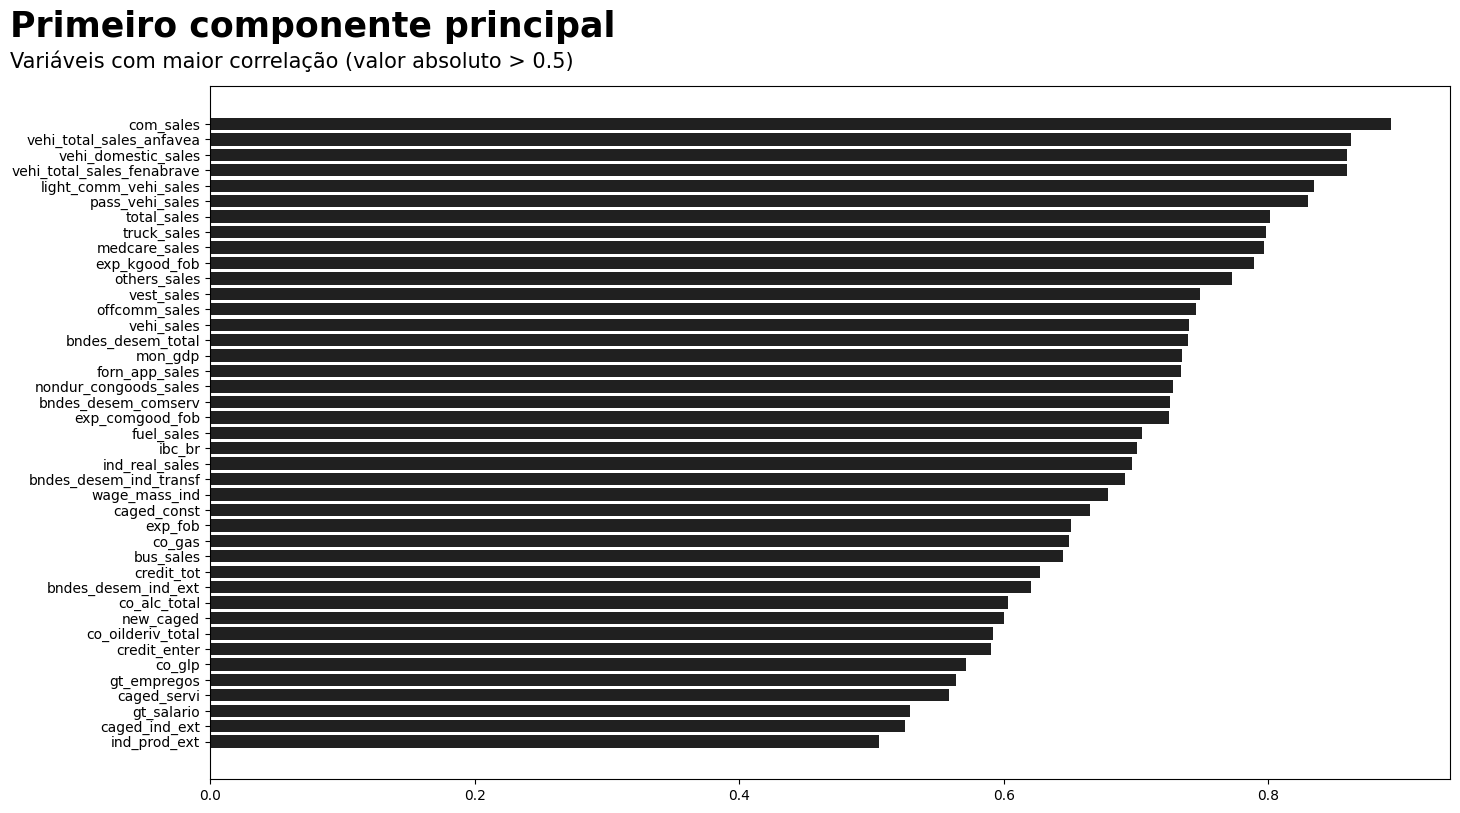

In [23]:
# Principais variáveis do PRIMEIRO PC

# cores
BLUE = "#076fa2"
RED = "#E3120B"
BLACK = "#202020"
GREY = "#a2a2a2"

fig, ax = plt.subplots(figsize=(16,9))
ax.barh(vars_c1, top_c1, align = "center", color = BLACK, )
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
ax.invert_yaxis()

# Add title
fig.text(
    0, 0.935, "Primeiro componente principal", 
    fontsize=25, fontweight="bold", fontfamily="Econ Sans Cnd"
)
# Add subtitle
fig.text(
    0, 0.900, "Variáveis com maior correlação (valor absoluto > 0.5)", 
    fontsize=15, fontfamily="Econ Sans Cnd"
)
fig.set_facecolor("white")
fig.show()
plt.savefig('dfm-images-plots/first_pc_correlations.png')

C:\Users\HENRI\AppData\Local\Temp\ipykernel_8320\146169398.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\HENRI\AppData\Local\Temp\ipykernel_8320\146169398.py:25: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: F

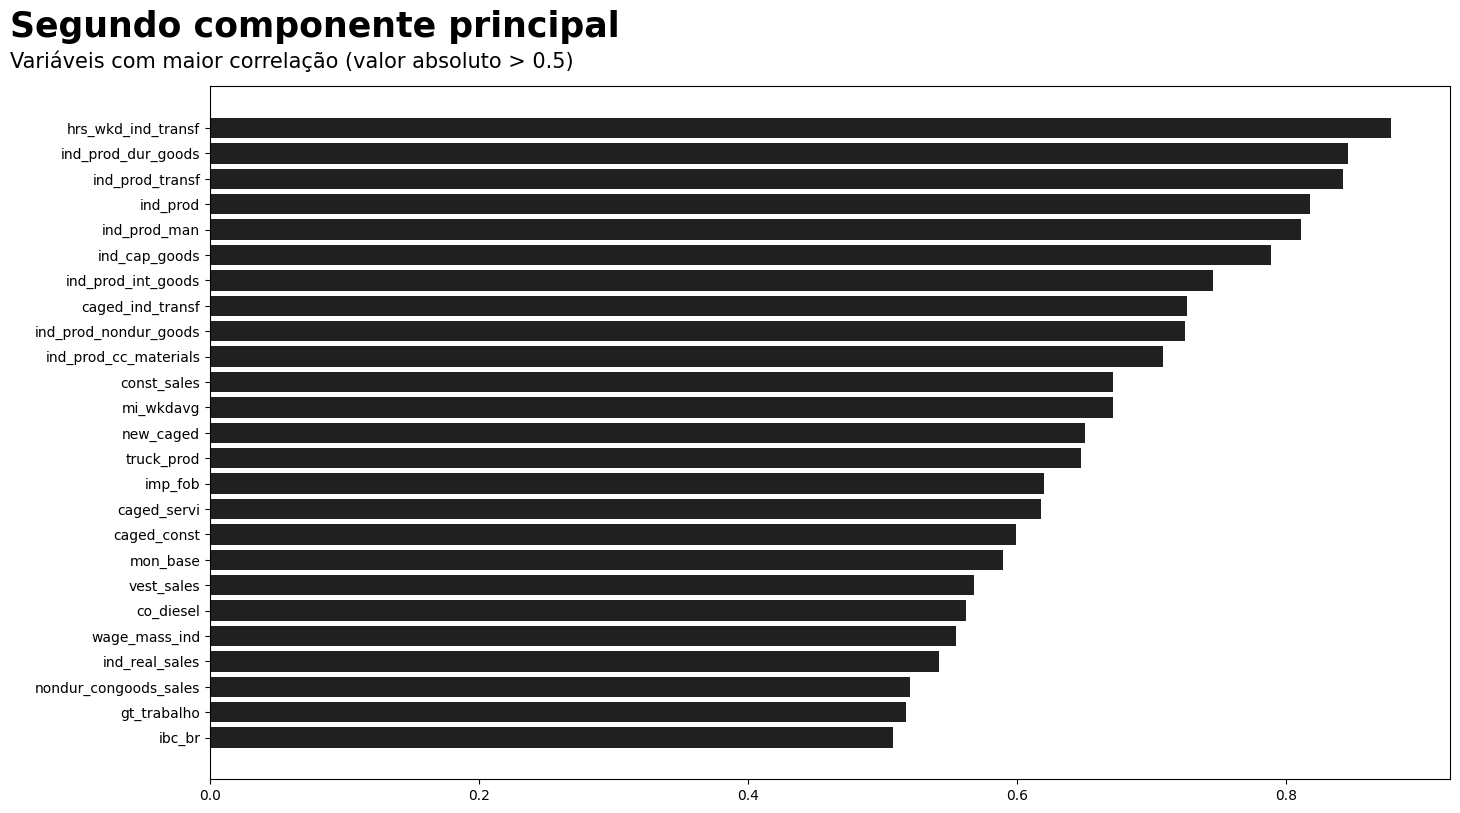

In [24]:
# Principais variáveis do SEGUNDO PC

# cores
BLUE = "#076fa2"
RED = "#E3120B"
BLACK = "#202020"
GREY = "#a2a2a2"

fig, ax = plt.subplots(figsize=(16, 9))
ax.barh(vars_c2, top_c2, align = "center", color = BLACK)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
ax.invert_yaxis()

# Add title
fig.text(
    0, 0.935, "Segundo componente principal", 
    fontsize=25, fontweight="bold", fontfamily="Econ Sans Cnd"
)
# Add subtitle
fig.text(
    0, 0.900, "Variáveis com maior correlação (valor absoluto > 0.5)", 
    fontsize=15, fontfamily="Econ Sans Cnd"
)
fig.set_facecolor("white")
fig.show()
plt.savefig('dfm-images-plots/second_pc_correlations.png')

C:\Users\HENRI\AppData\Local\Temp\ipykernel_8320\530368070.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\HENRI\AppData\Local\Temp\ipykernel_8320\530368070.py:25: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: F

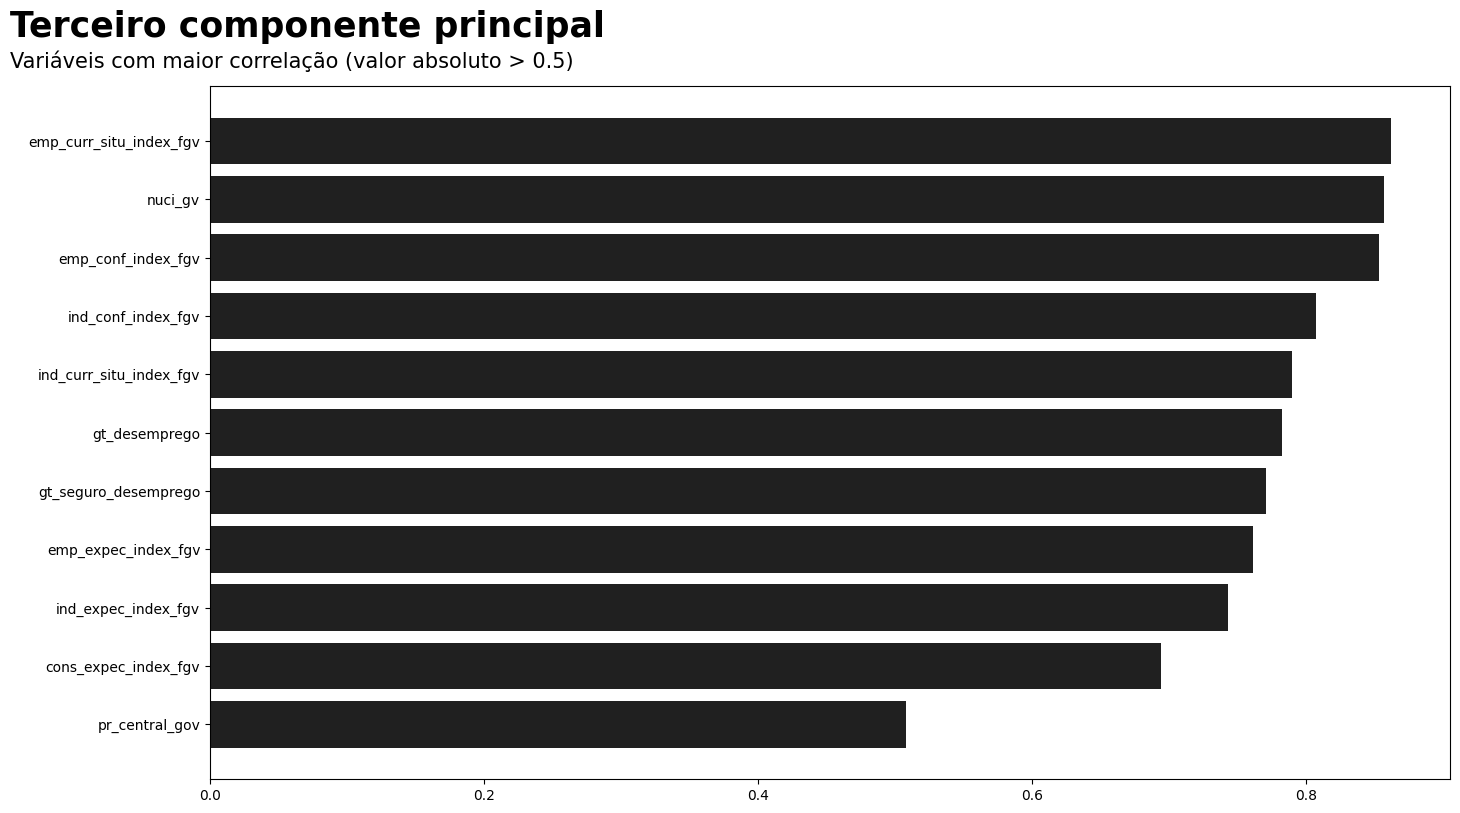

In [25]:
# Principais variáveis do TERCEIRO PC

# cores
BLUE = "#076fa2"
RED = "#E3120B"
BLACK = "#202020"
GREY = "#a2a2a2"

fig, ax = plt.subplots(figsize=(16, 9))
ax.barh(vars_c3, top_c3, align = "center", color = BLACK)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
ax.invert_yaxis()

# Add title
fig.text(
    0, 0.935, "Terceiro componente principal", 
    fontsize=25, fontweight="bold", fontfamily="Econ Sans Cnd"
)
# Add subtitle
fig.text(
    0, 0.900, "Variáveis com maior correlação (valor absoluto > 0.5)", 
    fontsize=15, fontfamily="Econ Sans Cnd"
)
fig.set_facecolor("white")
fig.show()
plt.savefig('dfm-images-plots/third_pc_correlations.png')

C:\Users\HENRI\AppData\Local\Temp\ipykernel_8320\788062922.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\HENRI\AppData\Local\Temp\ipykernel_8320\788062922.py:25: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: F

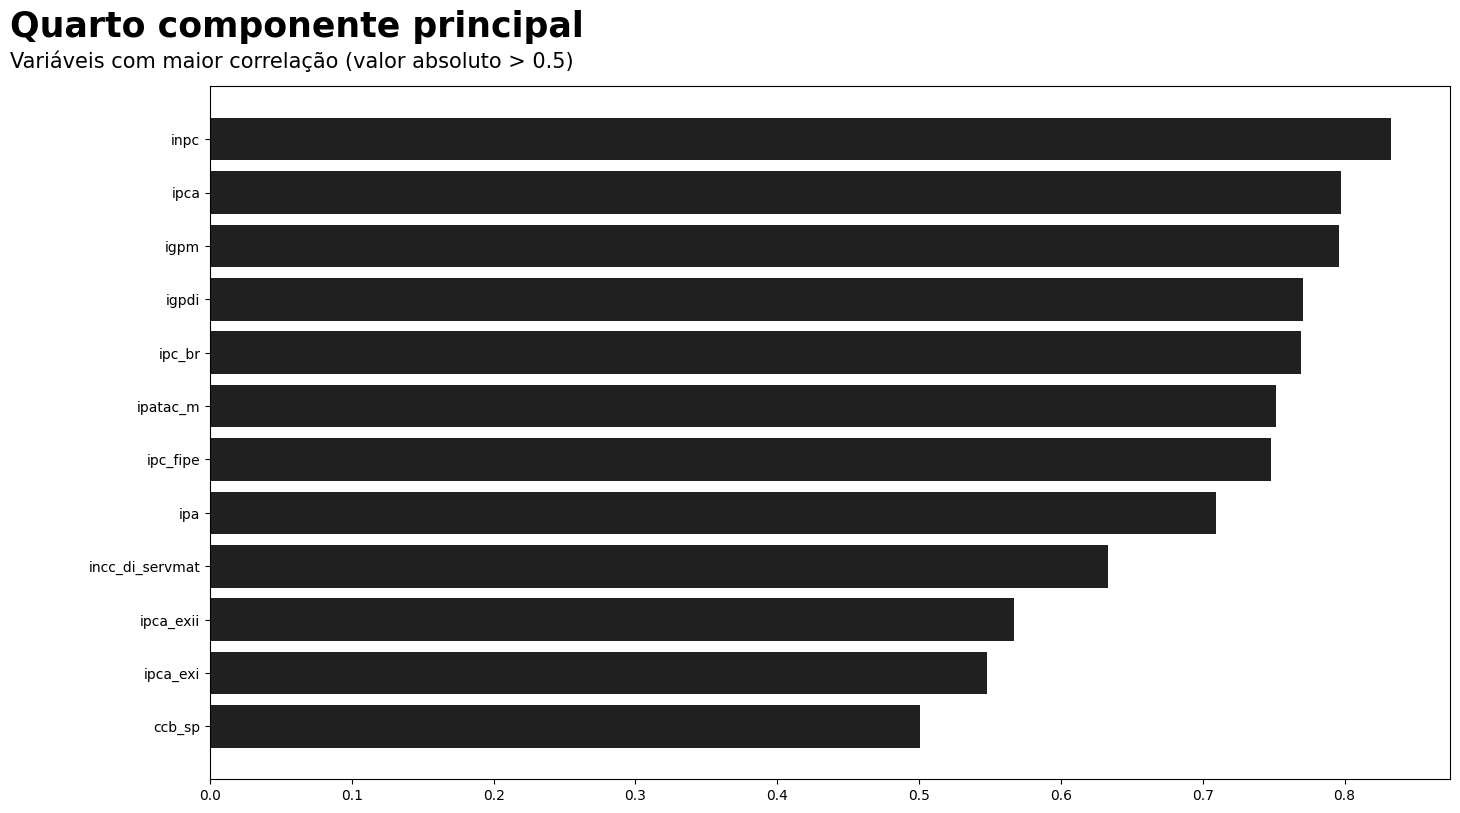

In [26]:
# Principais variáveis do QUARTO PC

# cores
BLUE = "#076fa2"
RED = "#E3120B"
BLACK = "#202020"
GREY = "#a2a2a2"

fig, ax = plt.subplots(figsize=(16, 9))
ax.barh(vars_c4, top_c4, align = "center", color = BLACK)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
ax.invert_yaxis()

# Add title
fig.text(
    0, 0.935, "Quarto componente principal", 
    fontsize=25, fontweight="bold", fontfamily="Econ Sans Cnd"
)
# Add subtitle
fig.text(
    0, 0.900, "Variáveis com maior correlação (valor absoluto > 0.5)", 
    fontsize=15, fontfamily="Econ Sans Cnd"
)
fig.set_facecolor("white")
fig.show()
plt.savefig('dfm-images-plots/fourth_pc_correlations.png')

C:\Users\HENRI\AppData\Local\Temp\ipykernel_8320\31037454.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\HENRI\AppData\Local\Temp\ipykernel_8320\31037454.py:25: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Font family 'Econ Sans Cnd' not found.
findfont: Fon

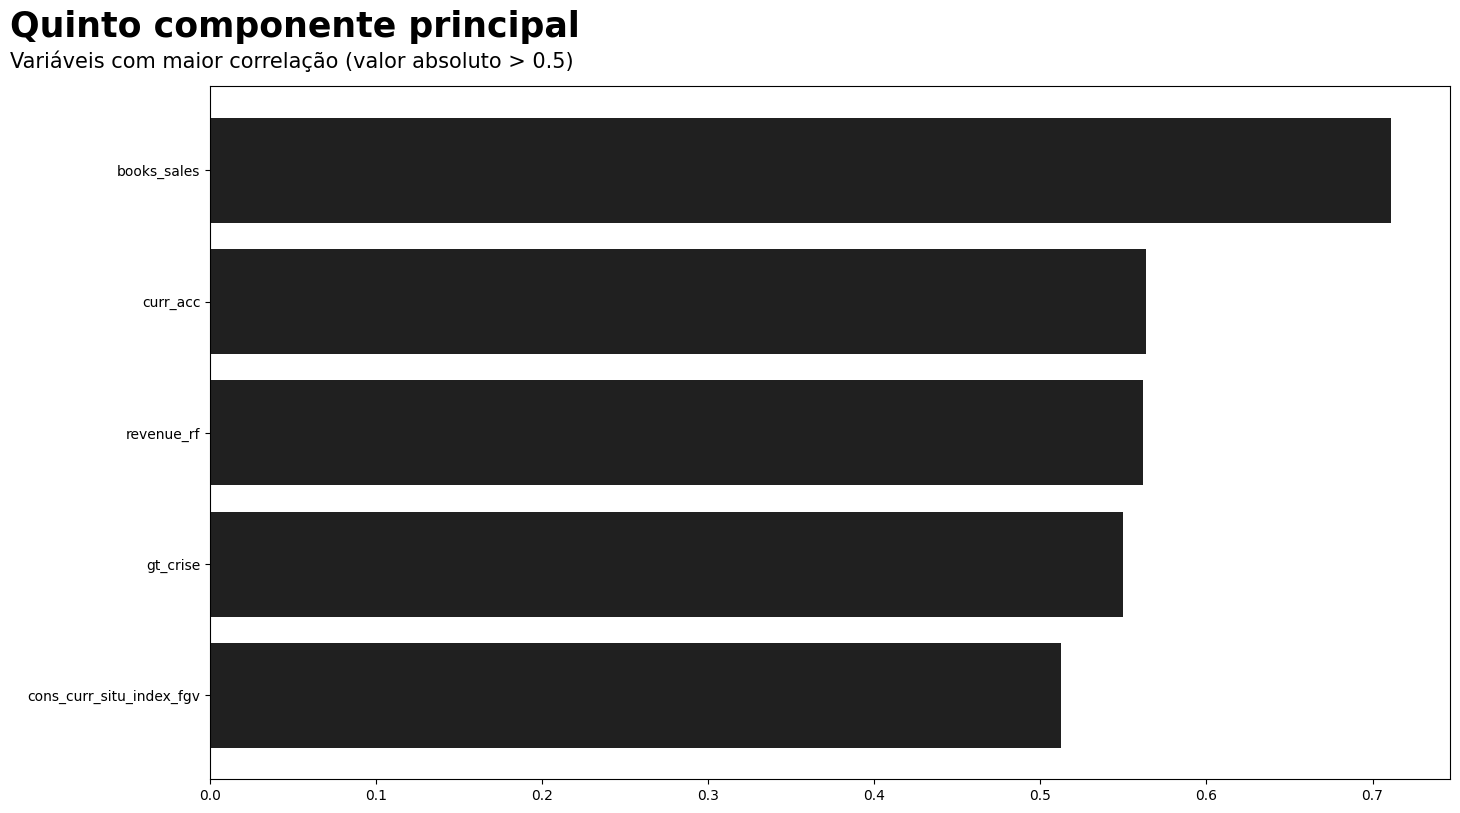

In [27]:
# Principais variáveis do QUINTO PC

# cores
BLUE = "#076fa2"
RED = "#E3120B"
BLACK = "#202020"
GREY = "#a2a2a2"

fig, ax = plt.subplots(figsize=(16, 9))
ax.barh(vars_c5, top_c5, align = "center", color = BLACK)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
ax.invert_yaxis()

# Add title
fig.text(
    0, 0.935, "Quinto componente principal", 
    fontsize=25, fontweight="bold", fontfamily="Econ Sans Cnd"
)
# Add subtitle
fig.text(
    0, 0.900, "Variáveis com maior correlação (valor absoluto > 0.5)", 
    fontsize=15, fontfamily="Econ Sans Cnd"
)
fig.set_facecolor("white")
fig.show()
plt.savefig('dfm-images-plots/fifth_pc_correlations.png')

array([[<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>]],
      dtype=object)

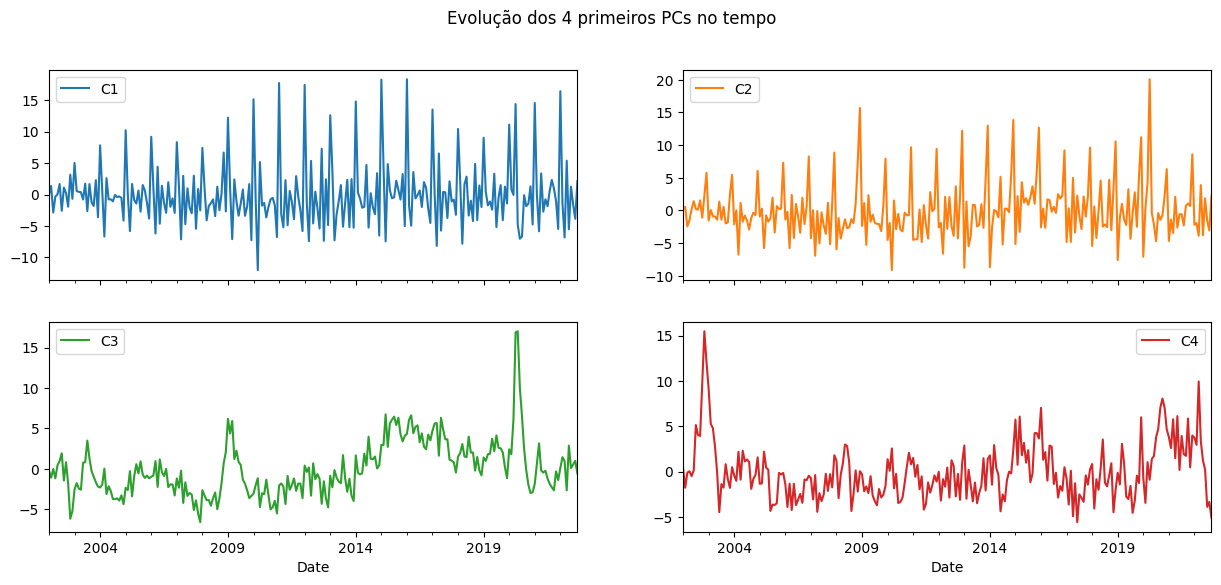

In [28]:
data_pca_df.loc[:, 'C1':'C4'].plot(subplots=True, layout=(2, 2), figsize=(15, 6), title = 'Evolução dos 4 primeiros PCs no tempo')

In [29]:
# Definindo dataframe com os pesos das variáveis em valor absoluto 
absolute_eigenvectors_df = abs(eigvectors_df).T
absolute_eigenvectors_df = pd.merge(absolute_eigenvectors_df, map_comp, left_index=True, right_index=True)
absolute_eigenvectors_df.reset_index(inplace = True)
absolute_eigenvectors_df.drop('index', axis = 1, inplace = True)

# Somando os pesos em valor absoluto por categoria/grupo de variáveis
comp_group_share = absolute_eigenvectors_df.groupby('category').sum()

# Transformando os pesos somados por categoria em porcentagem da soma total dos pesos
for i in list(comp_group_share.columns):
    comp_group_share[i] = comp_group_share[i].apply(lambda x: x / comp_group_share[i].sum())

comp_group_share = comp_group_share.iloc[:, : 10]
comp_group_share.columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']
comp_group_share = comp_group_share.T
comp_group_share

category,Energia,Expectativas,Financeiras,Google Trends,Mercado de Trabalho,Preços,Produção,Setor Externo,Setor Público,Vendas
C1,0.093941,0.051148,0.145439,0.037318,0.083105,0.050778,0.149742,0.069651,0.019959,0.298920
C2,0.078439,0.087741,0.123084,0.049650,0.141547,0.044099,0.258166,0.053045,0.037784,0.126446
C3,0.103459,0.271931,0.067510,0.083547,0.045175,0.130837,0.149846,0.027541,0.067914,0.052239
C4,0.043753,0.082574,0.104093,0.027419,0.032880,0.469880,0.093694,0.037252,0.049943,0.058511
C5,0.097981,0.132145,0.167494,0.100090,0.066748,0.111542,0.063384,0.077026,0.055679,0.127911
C6,0.105480,0.185667,0.160895,0.033201,0.066461,0.132136,0.107367,0.042860,0.105781,0.060153
C7,0.168557,0.138095,0.123591,0.043507,0.029848,0.266470,0.089281,0.030836,0.066031,0.043784
C8,0.119887,0.133116,0.150797,0.043789,0.053980,0.221918,0.088056,0.030434,0.096585,0.061438
C9,0.163406,0.111830,0.214057,0.041845,0.026641,0.160284,0.100511,0.056738,0.046419,0.078268
C10,0.144455,0.118022,0.137632,0.094920,0.049722,0.239324,0.072408,0.035512,0.063094,0.044911


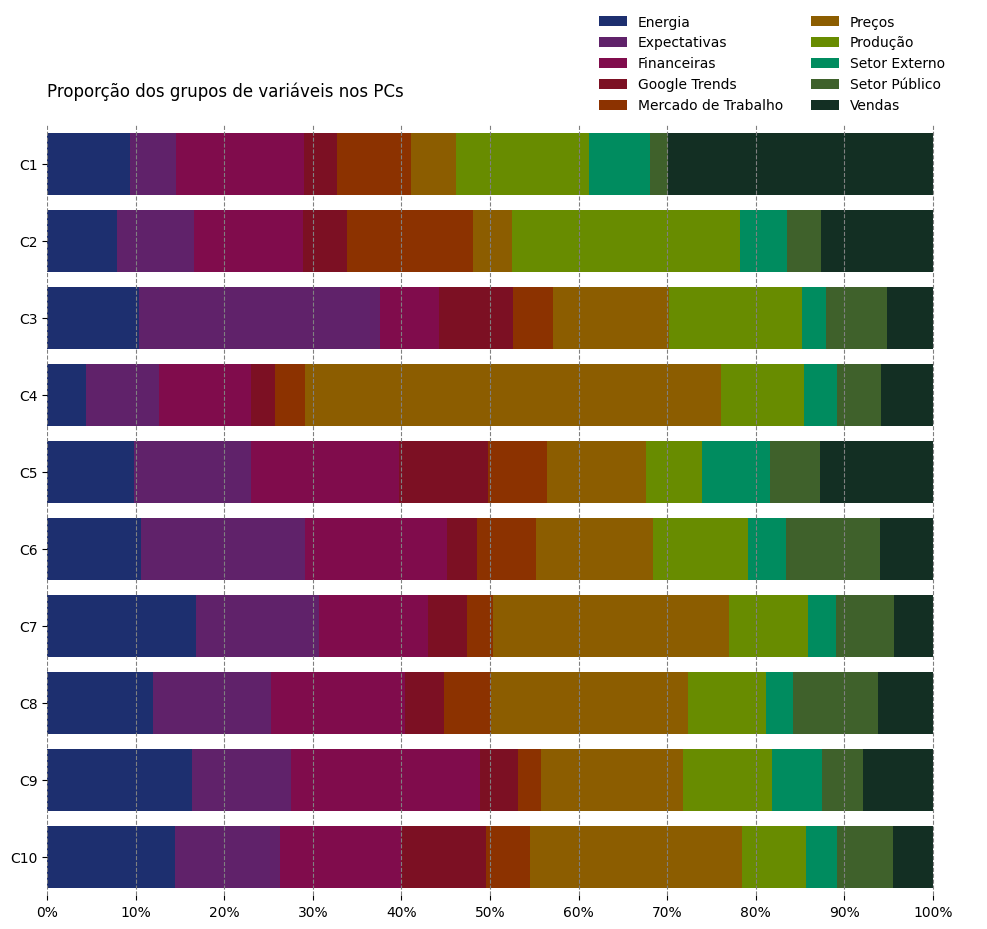

In [30]:
# variables
labels = list(comp_group_share.columns)
colors = ['#1d2f6f', '#60226a', '#800c4c', '#7c1023', '#8c3200', '#8c5d00', '#688c00', '#008c5f', '#3f612b', '#132f23']
title = 'Proporção dos grupos de variáveis nos PCs\n'

# Definindo a função
def plot_stackedbar_p(df, labels, colors, title):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
# legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=2, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.invert_yaxis()
plt.show()
    
plot_stackedbar_p(comp_group_share, labels, colors, title)
plt.savefig('dfm-images-plots/components_category_share.png')